In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D

from Mytorch import nn, optim, tensor, loss
from Mytorch.nn.sequential import Sequential
from Mytorch.nn.linear import Linear
from Mytorch.nn.activation_function import *
from Mytorch.loss.lossFunction import CrossEntropy, MSE
from Mytorch.evaluator.performance import ClassificationPerformance
from Mytorch.optim.sgd import SGD
from Mytorch.utils import accuracy

# import loss
# import optim
# import nn
# from tensor import Tensor

ModuleNotFoundError: No module named 'Mytorch'

## 加载数据

In [9]:
m = loadmat("dataset/mnist_small_matlab.mat")

trainData, train_labels = m['trainData'], m['trainLabels']
testData, test_labels = m['testData'], m['testLabels']
train_images = trainData.reshape(-1, 10000).transpose(1, 0)
train_labels = train_labels.transpose(1, 0)
test_images = testData.reshape(-1, 2000).transpose(1, 0)
test_labels = test_labels.transpose(1, 0) 
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(10000, 784)
(10000, 10)
(2000, 784)
(2000, 10)


## 定义网络结构

In [4]:
# 初始化各层及激活函数
model = Sequential("sequential")
linear1 = Linear("linear1", 784, 256)
f1 = Relu("f1")
linear2 = Linear("linear2", 256, 100)
f2 = Relu("f2")
linear3 = Linear("linear3", 100, 10)
f3 = SoftMax("f3")

# 构建网络
model.add_module(linear1)
model.add_module(f1)
model.add_module(linear2)
model.add_module(f2)
model.add_module(linear3)
model.add_module(f3)



**********************************
network: odict_keys(['linear1', 'f1', 'linear2', 'f2', 'linear3', 'f3'])
w_dict: odict_keys(['linear1', 'linear2', 'linear3'])
b_dict: odict_keys(['linear1', 'linear2', 'linear3'])
z_dict: odict_keys(['f1', 'f2', 'f3'])
a_dict: odict_keys(['f1', 'f2', 'f3'])
**********************************




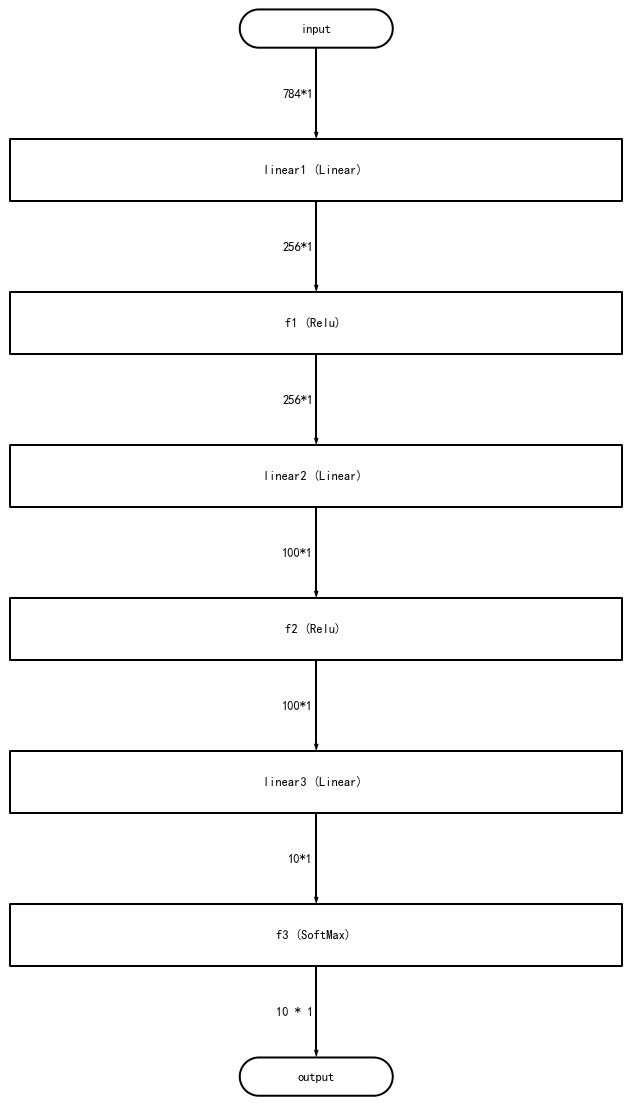

In [5]:
# 可视化网络结构
model.show()

## 训练

In [6]:
optimizer = SGD(model, lr=0.005)
criterion = CrossEntropy()

E_list = []
train_Loss_list = []
train_acc_list = []
test_Loss_list = []
test_acc_list = []
batch_size = 100
max_epoch = 10
for epoch in range(max_epoch):
    E_list.append(epoch)
    
    model.train()
    sample_idxs = np.random.permutation(train_images.shape[0])
    num_batch = int(np.ceil(train_images.shape[0]/batch_size))
    train_cost = 0
    acc = 0
    for batch_idx in range(num_batch):
        x = Tensor(train_images[sample_idxs[batch_size*batch_idx:min(batch_size*(batch_idx + 1),train_images.shape[0])],:])
        y = Tensor(train_labels[sample_idxs[batch_size*batch_idx:min(batch_size*(batch_idx + 1),train_labels.shape[0])],:])
        y_pred = model(x)
        y_pre = y_pred.datas
        acc += accuracy(y, y_pre)
        optimizer.zero_grad()
        loss = criterion(y_pred,y)
        train_cost += loss.datas 

        # print("loss:", loss.datas, "acc:" ,accuracy(y, y_pre))

        loss.backward()
        optimizer.step()
    
    train_cost /= train_images.shape[0]
    acc /= train_images.shape[0]
    train_Loss_list.append(train_cost) 
    train_acc_list.append(acc)


    model.eval()
    sample_idxs = np.random.permutation(test_images.shape[0])
    num_batch = int(np.ceil(test_images.shape[0]/batch_size))
    acc = 0
    test_cost = 0
    for batch_idx in range(num_batch):
            x = Tensor(test_images[sample_idxs[batch_size*batch_idx:min(batch_size*(batch_idx + 1),test_images.shape[0])],:])
            y = Tensor(test_labels[sample_idxs[batch_size*batch_idx:min(batch_size*(batch_idx + 1),test_labels.shape[0])],:])
            y_pre = model(x)
            loss = criterion(y_pre ,y)
            test_cost += loss.datas
            y_pre = y_pre.datas
            acc += accuracy(y, y_pre)
    acc /= test_labels.shape[0]
    test_cost /= test_images.shape[0]
    test_Loss_list.append(test_cost) 
    test_acc_list.append(acc)
    print("epoch= ",epoch," train cost = ",train_Loss_list[-1],"acc on traintset = ",train_acc_list[-1], "\ntest cost = ",test_Loss_list[-1],"acc on testtset = ",test_acc_list[-1])
    # model_name = f'model{epoch + 1000}.pkl'
#     rw = model
#     output_hal = open(model_name, 'wb')
#     str = pickle.dumps(rw)
#     output_hal.write(str)
#     output_hal.close()

epoch=  0  train cost =  0.7110068605634299 acc on traintset =  0.7684 
test cost =  0.2490032716745066 acc on testtset =  0.9325
epoch=  1  train cost =  0.22133399924311756 acc on traintset =  0.9347 
test cost =  0.18845614181024753 acc on testtset =  0.95
epoch=  2  train cost =  0.13491820310838343 acc on traintset =  0.9597 
test cost =  0.2658592201277415 acc on testtset =  0.918
epoch=  3  train cost =  0.10435481974374596 acc on traintset =  0.9672 
test cost =  0.15483154181758638 acc on testtset =  0.9535
epoch=  4  train cost =  0.06988438931809755 acc on traintset =  0.9786 
test cost =  0.1304277835520053 acc on testtset =  0.9635
epoch=  5  train cost =  0.04680576330373174 acc on traintset =  0.9872 
test cost =  0.187285338004382 acc on testtset =  0.9495
epoch=  6  train cost =  0.029855439686008158 acc on traintset =  0.993 
test cost =  0.15762938811945593 acc on testtset =  0.9565
epoch=  7  train cost =  0.021126170039340902 acc on traintset =  0.9952 
test cost =

## 绘制图片

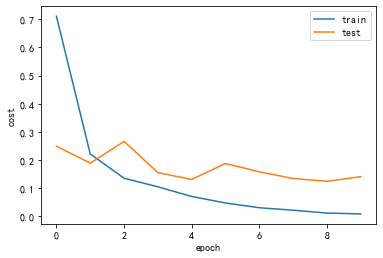

In [7]:
# 绘制cost
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(train_Loss_list, label = "train")
plt.plot(test_Loss_list, label = "test")
plt.legend()
plt.savefig("cost_of_train_and_test.png", dpi = 200)

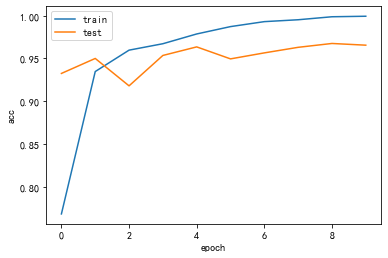

In [8]:
# 绘制acc
plt.xlabel("epoch")
plt.ylabel("acc")
plt.plot(train_acc_list, label = "train")
plt.plot(test_acc_list, label = "test")
plt.legend()
plt.savefig("acc_of_train_and_test.png", dpi = 200)

## 评估性能

In [9]:
model.eval()
y_pred_list = []
y_real_list = []
for i in range(test_images.shape[0]):
        x = Tensor(test_images[i])
        y_read = Tensor(test_labels[i])
        x = x.reshape((1,1,28,28))
        y_pred = model(x)
        y_pred_list.append(np.argmax(y_pred.datas))
        y_real_list.append(np.argmax(y_read.datas))

显示百分比：
[[ 0.98  0.00  0.00  0.00  0.00  0.00  0.01  0.00  0.00  0.00]
 [ 0.00  0.93  0.01  0.01  0.01  0.00  0.00  0.00  0.04  0.00]
 [ 0.02  0.01  0.94  0.02  0.01  0.00  0.00  0.01  0.01  0.00]
 [ 0.00  0.00  0.01  0.98  0.00  0.01  0.00  0.00  0.00  0.00]
 [ 0.00  0.00  0.00  0.00  0.96  0.00  0.00  0.00  0.00  0.02]
 [ 0.00  0.00  0.00  0.01  0.00  0.99  0.00  0.00  0.00  0.01]
 [ 0.01  0.00  0.00  0.01  0.01  0.00  0.97  0.01  0.01  0.00]
 [ 0.00  0.00  0.00  0.01  0.00  0.00  0.00  0.98  0.00  0.00]
 [ 0.00  0.01  0.00  0.02  0.00  0.01  0.00  0.00  0.97  0.01]
 [ 0.00  0.00  0.00  0.01  0.00  0.00  0.00  0.00  0.01  0.96]]


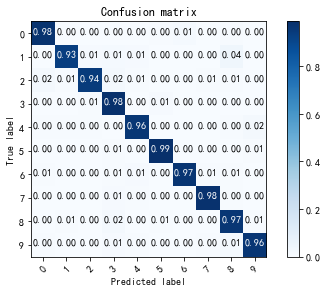

In [10]:
cp = ClassificationPerformance(y_pred_list, y_real_list, 10)
cp.showConfusionMatrix()

In [12]:
print("各类别召回率：",cp.getRecall(), "平均召回率:", np.average(cp.getRecall()))
print("各类别精确率：",cp.getPrecision(), "平均精确率:", np.average(cp.getPrecision()))
print("各类别F1分数：",cp.getF1Score(), "平均精确率:", np.average(cp.getF1Score()))
print("平均准确率:", cp.getAccuracy())

各类别召回率： [ 0.98  0.93  0.94  0.98  0.96  0.99  0.97  0.98  0.97  0.96] 平均召回率: 0.9663086634056336
各类别精确率： [ 0.97  0.99  0.98  0.92  0.97  0.98  0.98  0.99  0.91  0.97] 平均精确率: 0.964752809226056
各类别F1分数： [ 0.97  0.96  0.96  0.95  0.96  0.98  0.98  0.98  0.94  0.97] 平均精确率: 0.965207100842101
平均准确率: 0.9655
